<a href="https://colab.research.google.com/github/enakai00/colab_GenAI_lecture/blob/main/AutoEncoder_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models

import tensorflow.keras.backend as K
from tensorflow.keras.datasets import fashion_mnist

In [2]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = np.pad(train_images, ((0, 0), (2, 2), (2, 2)), constant_values=0)
test_images = np.pad(test_images, ((0, 0), (2, 2), (2, 2)), constant_values=0)
train_images = train_images.reshape(
                  (len(train_images), 32*32)).astype('float32') / 255
test_images = test_images.reshape(
                  (len(test_images), 32*32)).astype('float32') / 255
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

4422102/4422102 [==============================] - 1s 0us/step


In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
encoder = models.load_model('/content/gdrive/My Drive/encoder_FashionMNIST.hd5')
decoder = models.load_model('/content/gdrive/My Drive/decoder_FashionMNIST.hd5')
model_input = tf.keras.Input(shape=(32*32,))
model = models.Model(model_input, decoder(encoder(model_input)))
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1024)]            0         
                                                                 
 sequential (Sequential)     (None, 2)                 96770     
                                                                 
 sequential_1 (Sequential)   (None, 1024)              98689     
                                                                 
Total params: 195,459
Trainable params: 195,459
Non-trainable params: 0
_________________________________________________________________


In [7]:
embeddings = encoder.predict(test_images[:3000], verbose=0)
example_labels = np.argmax(test_labels[:3000], axis=1)

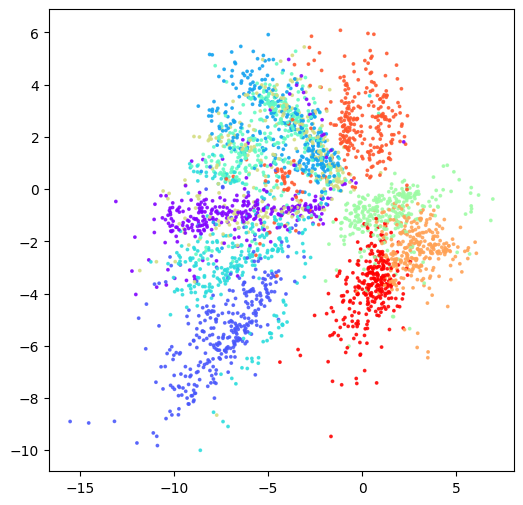

In [8]:
fig = plt.figure(figsize=(6, 6))
subplot = fig.add_subplot(1, 1, 1)
_ = subplot.scatter(embeddings[:, 0], embeddings[:, 1],
                    cmap='rainbow',
                    c=example_labels, alpha=0.8, s=3)

In [34]:
reconstructions[0]

array([1.2042563e-04, 1.9789903e-07, 6.4806801e-07, ..., 1.6762228e-14,
       1.7813009e-13, 1.0764464e-12], dtype=float32)

array([1, 2, 3])

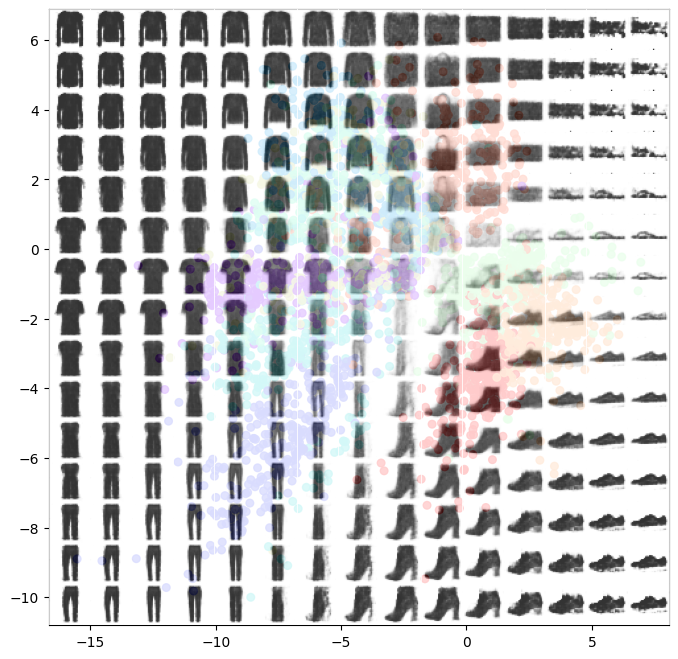

In [63]:
import copy
from matplotlib import colormaps

x = np.linspace(min(embeddings[:, 0]), max(embeddings[:, 0]), 15)
y = np.linspace(max(embeddings[:, 1]), min(embeddings[:, 1]), 15)
xv, yv = np.meshgrid(x, y)
xv = xv.flatten()
yv = yv.flatten()
grid = np.array(list(zip(xv, yv)))

reconstructions = decoder.predict(grid, verbose=0)

fig = plt.figure(figsize=(8, 8))


subplot = fig.add_subplot(1, 1, 1)
subplot.scatter(embeddings[:, 0], embeddings[:, 1],
                cmap='rainbow',
                c=example_labels, alpha=0.8, s=30)

my_cmap = copy.copy(colormaps['gray_r'])
my_cmap.set_bad(alpha=0)

fig.subplots_adjust(hspace=0, wspace=0)
for i in range(15*15):
    subplot = fig.add_subplot(15, 15, i + 1)
    subplot.axis('off')
    subplot.imshow(reconstructions[i].reshape((32, 32)),
              vmin=0, vmax=1, cmap=plt.cm.gray_r, alpha=0.8)
#    img = map(lambda x: np.nan if x < 0.01 else x, reconstructions[i])
#    subplot.imshow(np.array(list(img)).reshape((32, 32)),
#              vmin=0, vmax=1, cmap=my_cmap, alpha=0.5)